In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import Data

# Initialisation des données 

In [2]:
lis = Data.clean_lis()
cal = Data.clean_cal()

# Question 1

In [3]:
#On calcule les prix moyens par type de propriété et quartier, arrondi à 2 chiffres après la virgule
MeanPrice = round(lis.pivot_table(index='property_type',columns='neighbourhood_group_cleansed',values = 'price', aggfunc = "mean"),2)
display(MeanPrice)

neighbourhood_group_cleansed,Ballard,Beacon Hill,Capitol Hill,Cascade,Central Area,Delridge,Downtown,Interbay,Lake City,Magnolia,Northgate,Other neighborhoods,Queen Anne,Rainier Valley,Seward Park,University District,West Seattle
property_type,,,,,,,,,,,,,,,,,
Apartment,108.07,84.61,119.18,123.81,103.24,98.33,153.99,131.25,87.64,151.83,86.63,107.21,123.50,93.13,86.00,92.93,98.10
Bed & Breakfast,84.50,89.00,142.20,NaN,NaN,72.00,94.50,NaN,92.00,75.00,70.00,106.43,209.00,74.60,NaN,NaN,164.67
Boat,75.00,NaN,NaN,391.33,NaN,NaN,NaN,95.00,NaN,NaN,NaN,415.00,85.00,NaN,NaN,NaN,NaN
Bungalow,85.00,99.00,140.00,NaN,70.00,NaN,NaN,NaN,NaN,NaN,NaN,84.75,205.00,NaN,NaN,NaN,NaN
Cabin,89.00,102.33,154.50,300.00,82.00,NaN,NaN,NaN,68.00,NaN,100.00,90.75,60.00,92.00,NaN,NaN,90.00
Camper/RV,75.00,375.00,NaN,100.00,NaN,NaN,NaN,NaN,NaN,NaN,50.00,173.50,83.33,87.00,NaN,NaN,120.00
Chalet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.00,NaN,NaN,NaN,NaN,135.00
Condominium,88.33,NaN,137.64,147.20,140.00,NaN,174.28,150.00,NaN,280.00,65.00,82.00,119.08,NaN,NaN,113.33,297.00
Dorm,NaN,NaN,NaN,NaN,NaN,NaN,39.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


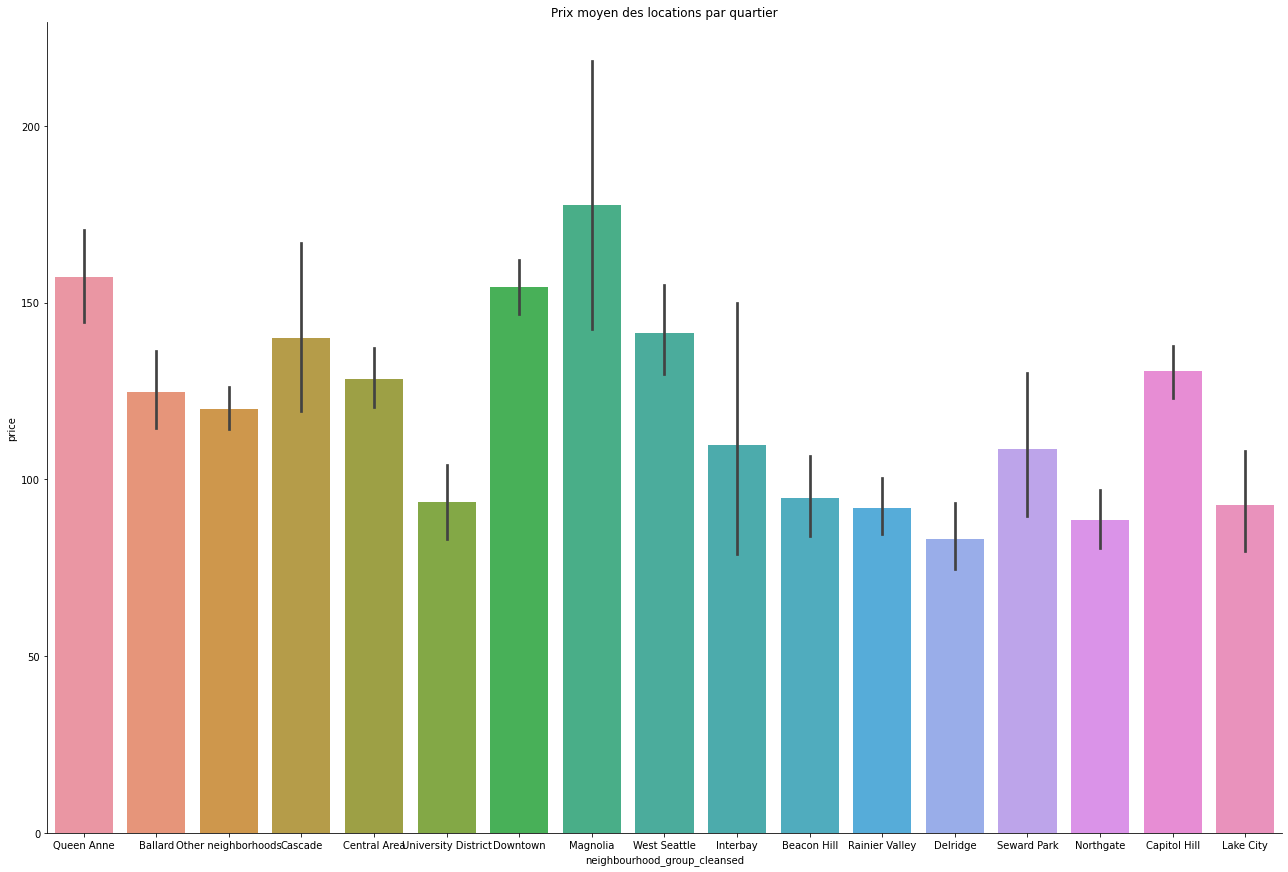

In [4]:
#Représentation graphique du prix moyen de la location selon le quartier
sns.catplot(x="neighbourhood_group_cleansed", y="price", kind="bar", data=lis, height = 12, aspect = 12/8)
plt.title("Prix moyen des locations par quartier")
plt.show()

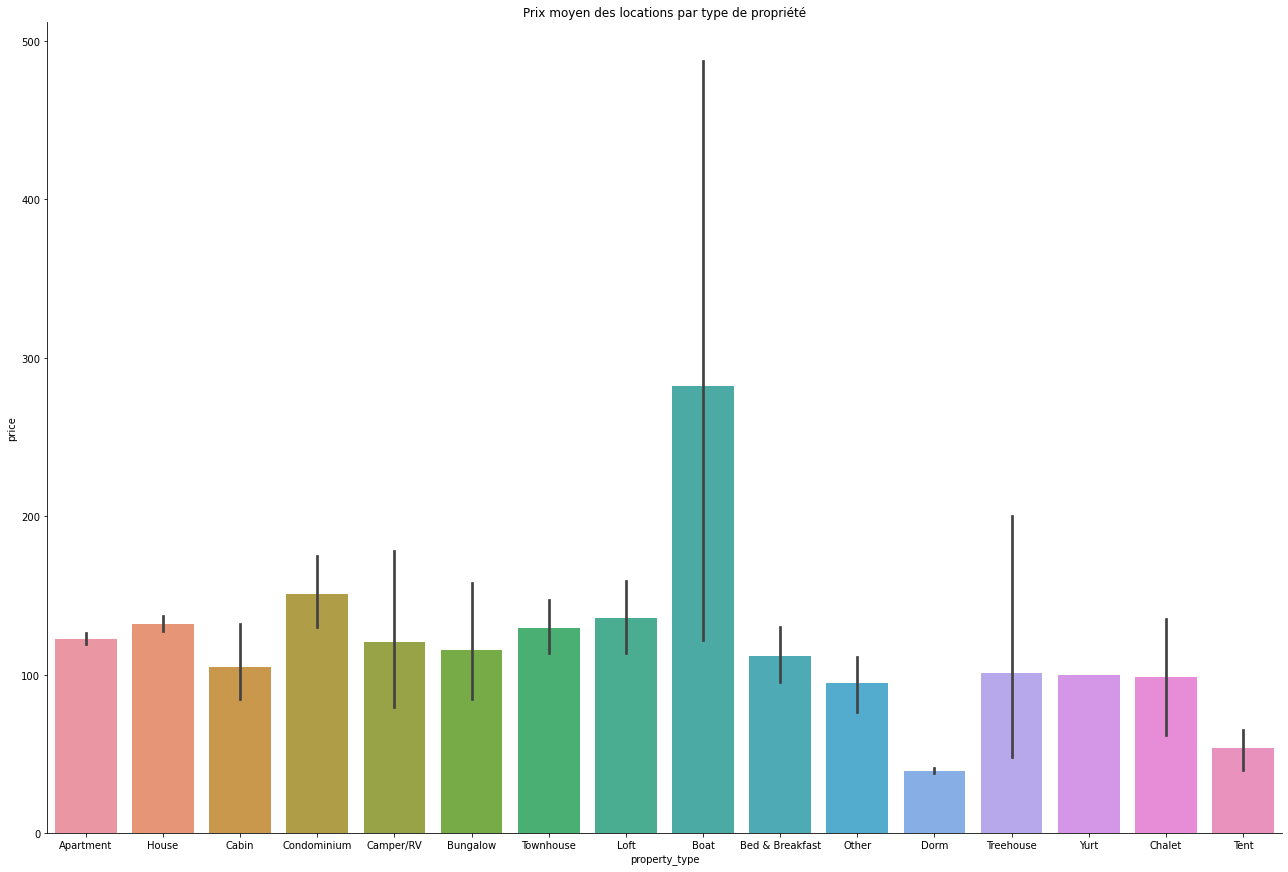

In [5]:
#Représentation graphique du prix moyen de la location selon le type de propriété
sns.catplot(x="property_type", y="price", kind="bar", data=lis, height = 12, aspect = 12/8)
plt.title("Prix moyen des locations par type de propriété")
plt.show()

# Question 2

In [6]:
#On fait une table de pivot comptant le nbr de nuits diposnibles par mois selon si le logement est disponible ou non
disp = cal.pivot_table(index='month',columns="available",values ="id",aggfunc = "count")

In [7]:
disp.rename(columns = {'t': 'disponible', 'f': 'non_disponible'}, inplace = True) 
display(disp)

available,non_disponible,disponible
month,,
01,47665,59239
02,37401,73321
03,34420,83938
04,38503,76037
05,38387,79971
06,37296,77244
07,44136,74222
08,42011,76347
09,37294,77246


In [8]:
#On récupère les maximums de chaque colonne
max = disp.max().to_list()
max

[47665, 87061]

In [9]:
display(disp[disp['disponible']==max[1]].disponible)
print("Ainsi, c'est en décembre que l'on trouve le plus de nuits disponibles : 87601")

month
12    87061
Name: disponible, dtype: int64

Ainsi, c'est en décembre que l'on trouve le plus de nuits disponibles : 87601


In [10]:
display(disp[disp['non_disponible']==max[0]].non_disponible)
print("Ainsi, c'est en Janvier que l'on trouve le moins de nuits disponibles : 47665")

month
01    47665
Name: non_disponible, dtype: int64

Ainsi, c'est en Janvier que l'on trouve le moins de nuits disponibles : 47665


# Question 3

In [11]:
#Pour regarder les critères qui influent sur les prix on regarde la matrice de corrélation
corr_lis = lis.corr()

<AxesSubplot:>

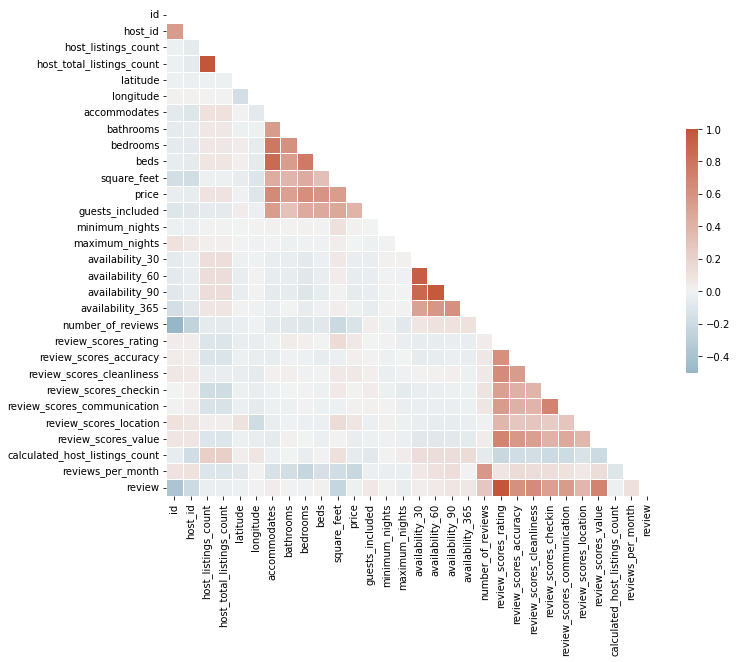

In [12]:
#Pour avoir une vision d'ensemble de la corrélation, on fait la heatmap. On voit ansi que les prix semblent être fortement corrélés 
#avec des variables comme le nombre de chambres ou encore la surface
#Pour réaliser cette heatmap, nous avons récupéré le code depuis le site Seaborn.

mask = np.triu(np.ones_like(corr_lis, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_lis,mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": .5})

[]

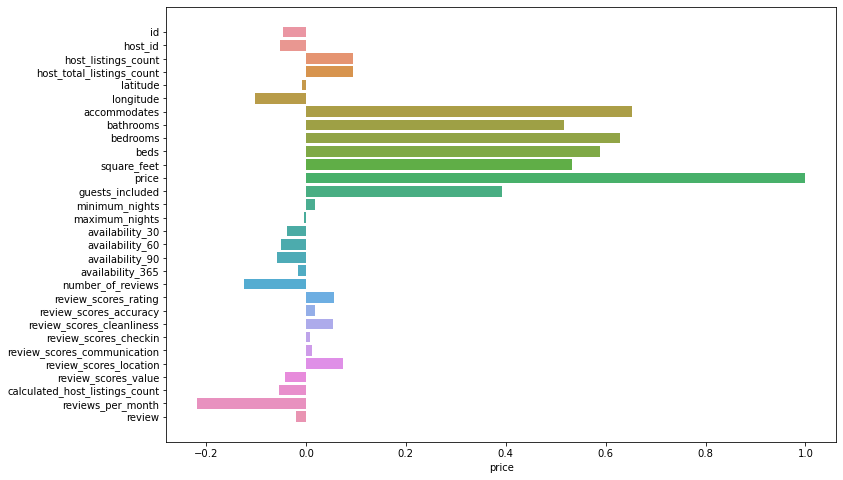

In [13]:
#On réalise alors un graph de la corrélation entre le prix et les autres variables 
#On voit bien que le prix dépend fortement du nombre de chambre, de la surface au sol ou encore des services (accomodates)
fig = plt.figure(figsize=(12, 8))
sns.barplot(x=corr_lis["price"], y=(corr_lis.columns))
plt.plot()

# Question 4

In [14]:
cal = Data.clean_cal_price()

In [15]:
price = round(cal.pivot_table(index='month',columns="available",values ="price",aggfunc = "mean"),2)
display(price)

available,t
month,
01,122.91
02,124.29
03,128.64
04,135.10
05,139.54
06,147.47
07,152.09
08,150.66
09,143.26


In [16]:
#On récupère le maximum et le minimum pour les logements disponibles
max_price = price["t"].max()
min_price = price["t"].min()


In [17]:
display(price[price['t']==max_price])
print("Ainsi, c'est en juillet que le prix moyen est le plus élevé pour les logements\nil est donc moins intéressant de visiter Seattle en juillet")

available,t
month,
07,152.09


Ainsi, c'est en juillet que le prix moyen est le plus élevé pour les logements
il est donc moins intéressant de visiter Seattle en juillet


In [18]:
display(price[price['t']==min_price].t)
print("Ainsi, c'est en janvier que le prix moyen est le plus faible pour les logements \nil est donc plus intéressant de visiter Seattle en janvier")

month
01    122.91
Name: t, dtype: float64

Ainsi, c'est en janvier que le prix moyen est le plus faible pour les logements 
il est donc plus intéressant de visiter Seattle en janvier
